In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
# Carregar dataset
df_colesterol = pd.read_csv('./datasets/dataset_colesterol.csv')

In [50]:
# Checar arquivo
df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     996 non-null    object 
 2   Fumante             997 non-null    object 
 3   Nível de Atividade  996 non-null    object 
 4   Idade               997 non-null    float64
 5   Peso                997 non-null    float64
 6   Altura              997 non-null    float64
 7   Colesterol          1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


- Temos algumas features que temos missing values
- Temos alguns tipos que poderiam ser diferentes, como Idade ser Int64
- Nossa variável dependente é Colesterol, e todas as demais são independentes que vamos usar para fazer a previsão como nosso modelo de regressão linear múltipla

In [51]:
# Preparar o dataset

# Remover colunas
df_colesterol.drop(columns=['Id'], axis=1, inplace=True)

In [52]:
# Renomear as colunas
df_colesterol.columns = [
  'grupo_sanguineo', 
  'fumante', 
  'nivel_atividade_fisica', 
  'idade',
  'peso',
  'altura',
  'nivel_colesterol'
]

In [53]:
# Fazer o bucketing, transformando variáveis númericas em categórias, mas sem alterar o original.

# Copiar o DF para o DF de EDA
df_colesterol_eda = df_colesterol.copy()

# Copiar o DF para o DF Bucketing
df_colesterol_bucketing = df_colesterol.copy()

# Executar o EDA

In [54]:
# Visualizar os dados
df_colesterol_eda.head(10)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,A,Não,Moderado,68.0,105.0,184.0,236.98
2,O,Não,Alto,25.0,64.8,180.0,161.79
3,A,Não,Alto,43.0,120.2,167.0,336.24
4,AB,Não,Baixo,79.0,88.5,175.0,226.23
5,B,Não,Baixo,68.0,66.8,170.0,185.31
6,A,Sim,Baixo,60.0,117.3,181.0,289.33
7,O,Sim,Moderado,35.0,86.9,174.0,216.48
8,O,Não,Baixo,62.0,81.3,166.0,235.30
9,B,Sim,Alto,44.0,32.7,165.0,97.79


In [55]:
# Analisar os valores das variáveis de categóricas
df_colesterol_eda.grupo_sanguineo.unique()

array(['B', 'A', 'O', 'AB', nan], dtype=object)

In [56]:
df_colesterol_eda.fumante.unique()

array(['Sim', 'Não', nan], dtype=object)

In [57]:
df_colesterol_eda.nivel_atividade_fisica.unique()

array(['Baixo', 'Moderado', 'Alto', nan], dtype=object)

In [58]:
# Analisar os missing values
df_colesterol_eda.isna().sum()

grupo_sanguineo           4
fumante                   3
nivel_atividade_fisica    4
idade                     3
peso                      3
altura                    3
nivel_colesterol          0
dtype: int64

In [59]:
# Para as variáveis numéricas, poderíamos usar a mediana ou média, dependendo se temos muitos outliers ou não.
# Para as variáveis categóricas, podemos usar a moda

df_colesterol_eda.describe()


,idade,peso,altura,nivel_colesterol
count,997.000000,997.000000,997.000000,1000.000000
mean,49.206620,76.496690,174.889669,199.453260
std,17.476704,21.439132,8.844703,50.625152
min,20.000000,15.400000,160.000000,36.260000
25%,34.000000,61.700000,167.000000,166.345000
50%,49.000000,75.500000,175.000000,199.455000
75%,65.000000,90.200000,183.000000,233.785000
max,79.000000,158.100000,190.000000,372.670000


- idade e altura a mediana e média são próximas, podemos usar a mediana.
- peso tem algo estranho, pois com idade mínima de 20 anos, não podemos ter um peso de 15kg, aqui é melhor usar a mediana, para evitar os outliers

In [60]:
# Coletar as medidas das features categóricas
moda_grupo_sanguineo = df_colesterol_eda.grupo_sanguineo.mode()[0]
moda_fumante = df_colesterol_eda.fumante.mode()[0]
moda_nivel_atividade_fisica = df_colesterol_eda.nivel_atividade_fisica.mode()[0]


In [61]:
# Coletar as medidas das features numéricas
mediana_idade = df_colesterol_eda.idade.median()
mediana_altura = df_colesterol_eda.altura.median()
mediana_peso = df_colesterol_eda.peso.median()

In [62]:
# Tratar os missing values
df_colesterol_eda.fillna(value={'grupo_sanguineo': moda_grupo_sanguineo,
                                'fumante': moda_fumante,
                                'nivel_atividade_fisica': moda_nivel_atividade_fisica,
                                'idade': mediana_idade,
                                'peso': mediana_peso,
                                'altura': mediana_altura}, inplace=True)

In [63]:
# Resultado do tratamento para os missing values
df_colesterol_eda.isna().sum()

grupo_sanguineo           0
fumante                   0
nivel_atividade_fisica    0
idade                     0
peso                      0
altura                    0
nivel_colesterol          0
dtype: int64

In [64]:
# Vamos agora converter os tipos das features numéricas, idade e altura, para inteiro
df_colesterol_eda.idade = df_colesterol_eda.idade.astype('int')
df_colesterol_eda.altura = df_colesterol_eda.altura.astype('int')

In [65]:
# Vamos avaliar como está nosso DF agora
df_colesterol_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grupo_sanguineo         1000 non-null   object 
 1   fumante                 1000 non-null   object 
 2   nivel_atividade_fisica  1000 non-null   object 
 3   idade                   1000 non-null   int64  
 4   peso                    1000 non-null   float64
 5   altura                  1000 non-null   int64  
 6   nivel_colesterol        1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [66]:
df_colesterol_eda.head(10)

,grupo_sanguineo,fumante,nivel_atividade_fisica,idade,peso,altura,nivel_colesterol
0,B,Sim,Baixo,33,85.1,186,199.63
1,A,Não,Moderado,68,105.0,184,236.98
2,O,Não,Alto,25,64.8,180,161.79
3,A,Não,Alto,43,120.2,167,336.24
4,AB,Não,Baixo,79,88.5,175,226.23
5,B,Não,Baixo,68,66.8,170,185.31
6,A,Sim,Baixo,60,117.3,181,289.33
7,O,Sim,Moderado,35,86.9,174,216.48
8,O,Não,Baixo,62,81.3,166,235.30
9,B,Sim,Alto,44,32.7,165,97.79


<Axes: xlabel='idade'>

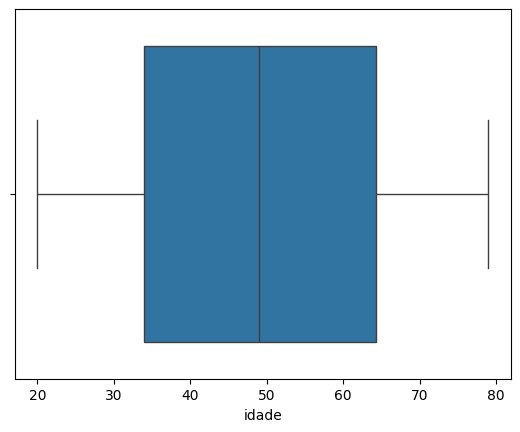

In [67]:
# Vamos analisar os outliers, pois está claro que temos estes casos na feature peso
sns.boxplot(data=df_colesterol_eda, x="idade")

<Axes: xlabel='altura'>

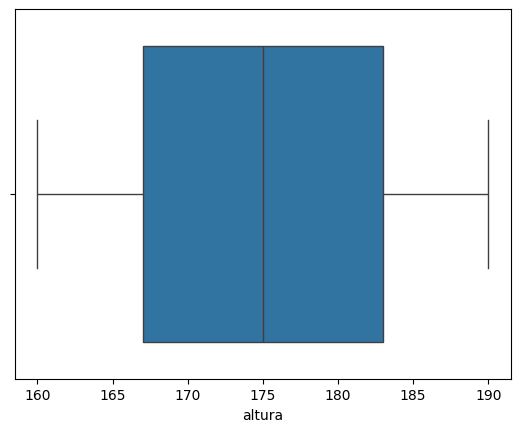

In [68]:
sns.boxplot(data=df_colesterol_eda, x="altura")

<Axes: xlabel='peso'>

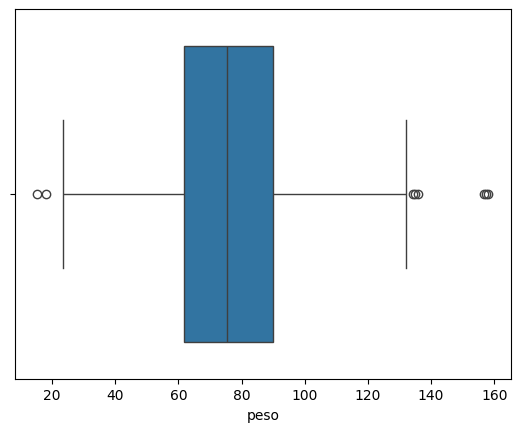

In [69]:
sns.boxplot(data=df_colesterol_eda, x="peso")

- De fato, temos outliers na feature peso, e não temos nas features idade e altura.
- Temos mais outliers no limite superior, e os casos do limite inferior podem ser erros mesmo

In [70]:
# Não vale treinar o modelo com outliers, neste caso, a melhor saída é remover os outliers
# Outra saída seria a substituição de outliers por média aritmética

# Vamos filtrar os outliers
df_colesterol_eda[df_colesterol_eda['peso'] < 40].peso.count()

37

In [71]:
# Remover os outliers do DF
df_colesterol_eda.drop(df_colesterol_eda[df_colesterol_eda['peso'] < 40].index, axis=0, inplace=True)

<Axes: xlabel='nivel_colesterol'>

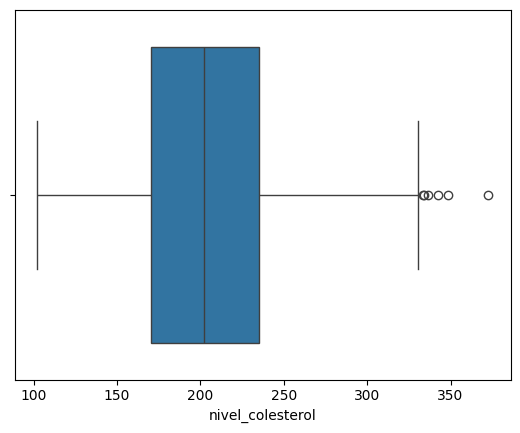

In [72]:
# Conferir a variável independente do nível de colesterol
sns.boxplot(data=df_colesterol_eda, x="nivel_colesterol")

- Não vamos remover os outliers do nível superior do peso ou nível de colesterol, pois estes dados parecem reais, não são como o caso de pesos menores de 40kg, vamos manter eles em nosso modelo.

<Axes: xlabel='grupo_sanguineo', ylabel='nivel_colesterol'>

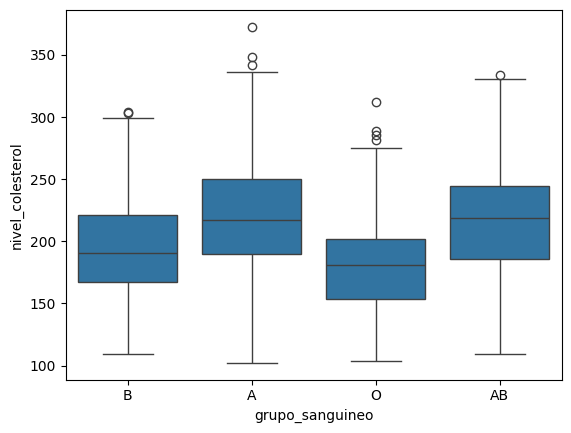

In [73]:
# Cruzamento de features categóricas com nível de colesterol
sns.boxplot(data=df_colesterol_eda, x="grupo_sanguineo", y="nivel_colesterol")

<Axes: xlabel='nivel_atividade_fisica', ylabel='nivel_colesterol'>

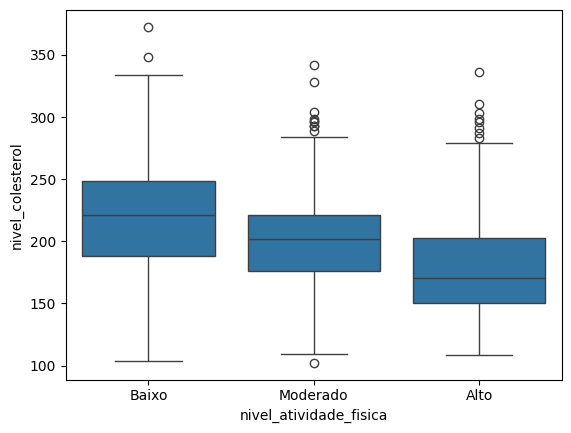

In [74]:
sns.boxplot(data=df_colesterol_eda, x="nivel_atividade_fisica", y="nivel_colesterol")

<Axes: xlabel='fumante', ylabel='nivel_colesterol'>

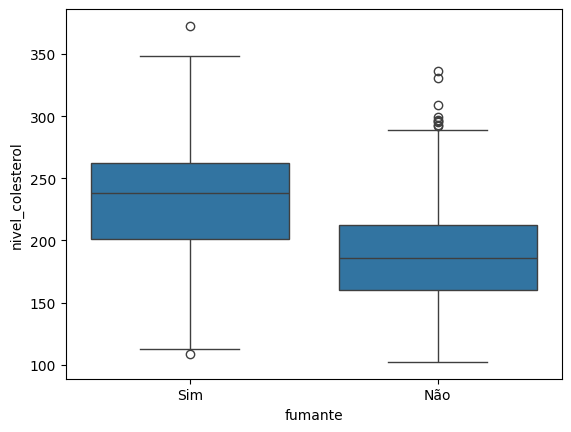

In [75]:
sns.boxplot(data=df_colesterol_eda, x="fumante", y="nivel_colesterol")

<Axes: xlabel='idade', ylabel='nivel_colesterol'>

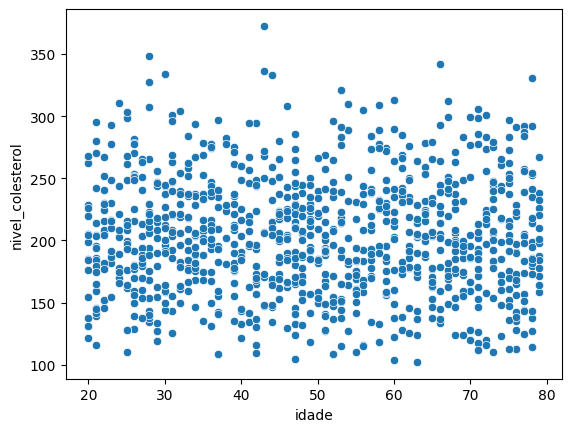

In [76]:
# Cruzamento das features numéricas com nível de colesterol
sns.scatterplot(data=df_colesterol_eda, x="idade", y="nivel_colesterol")

- Com esse gráfico fica complicado traçar algum padrão, não sendo possível avaliar uma correlação entre idade e nível de colesterol.

<Axes: xlabel='peso', ylabel='nivel_colesterol'>

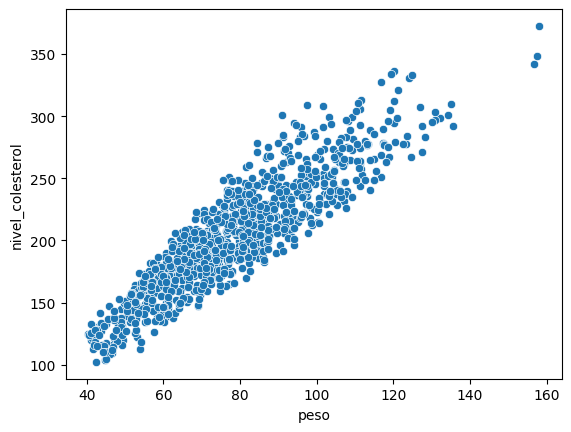

In [77]:
sns.scatterplot(data=df_colesterol_eda, x="peso", y="nivel_colesterol")

- Aqui sim, apesar dos outliers, temos uma tendência clara que quanto maior o peso, maior o nível de colesterol

<Axes: xlabel='altura', ylabel='nivel_colesterol'>

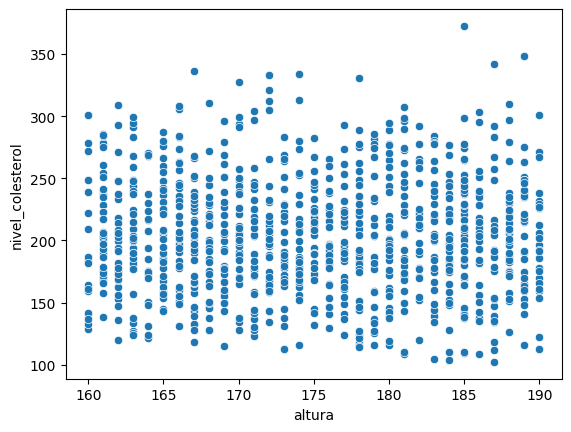

In [78]:
sns.scatterplot(data=df_colesterol_eda, x="altura", y="nivel_colesterol")

- Altura também parece não afetar diretamente o nível de colesterol, não sendo provável que exista uma correlação entre a altura e o nível de colesterol